<center><h1>#2 Group Project Report</h1></center>

<h3><center><strong>Task 1</strong></center></h3>

##### Method 2

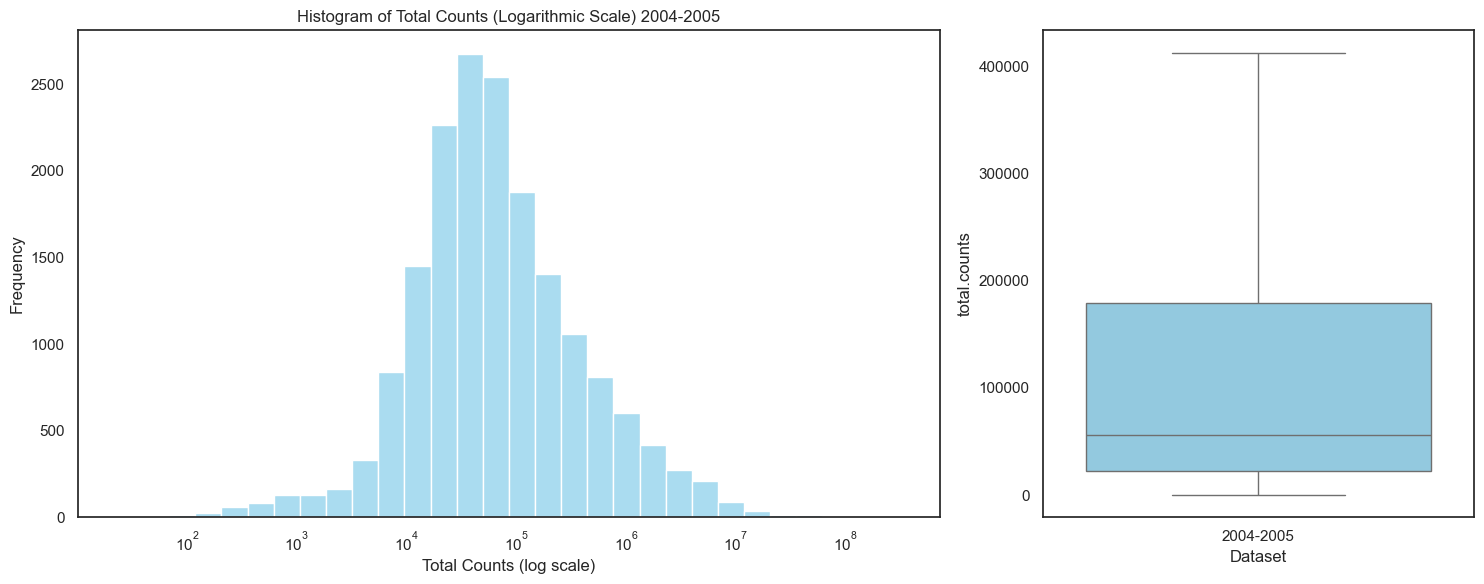

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import joypy

# Load dataset
df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')
df2 = pd.read_csv('Solar_flare_RHESSI_2015_16.csv')

sns.set(style="white")
sns.set_palette("pastel")

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1]})

# Plot the histogram on the first subplot
sns.histplot(df['total.counts'], bins=30, kde=False, color='skyblue', alpha=0.7, log_scale=True, ax=axes[0])
axes[0].set_xlabel('Total Counts (log scale)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Total Counts (Logarithmic Scale) 2004-2005')

sns.boxplot(x='Dataset', y='total.counts', data=pd.concat([df.assign(Dataset='2004-2005')]), showfliers=False, color='skyblue')

plt.subplots_adjust(wspace=5)
# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


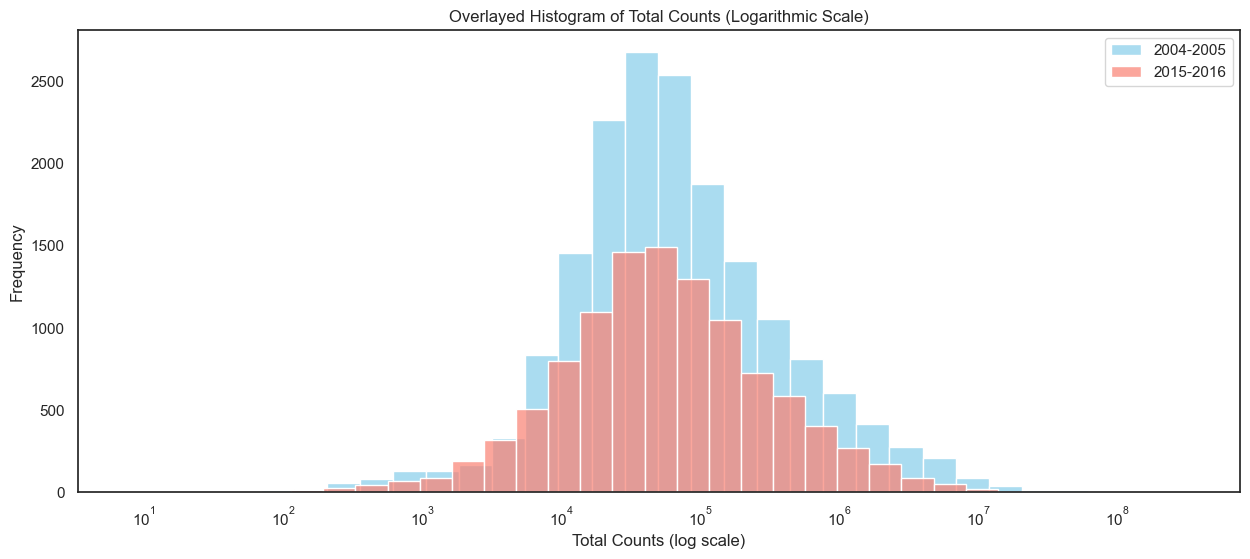

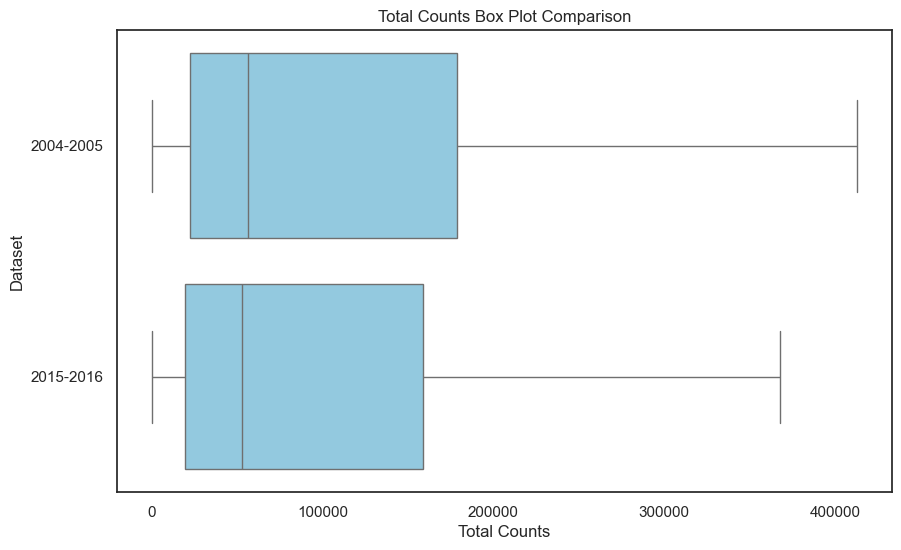

In [27]:
sns.set(style="white")
sns.set_palette("pastel")

fig, ax = plt.subplots(figsize=(15, 6))

# Plot the first histogram on the same subplot
sns.histplot(df['total.counts'], bins=30, kde=False, color='skyblue', alpha=0.7, log_scale=True, label='2004-2005', ax=ax)

# Plot the second histogram on the same subplot, using different color
sns.histplot(df2['total.counts'], bins=30, kde=False, color='salmon', alpha=0.7, log_scale=True, label='2015-2016', ax=ax)

ax.set_xlabel('Total Counts (log scale)')
ax.set_ylabel('Frequency')
ax.set_title('Overlayed Histogram of Total Counts (Logarithmic Scale)')

# Add legend
ax.legend()

plt.show()


# Combine box plots for df and df2
plt.figure(figsize=(10, 6))
boxprops = dict(linestyle='-', linewidth=2, color='black')
# Use Seaborn for combined box plot with horizontal orientation
sns.boxplot(x='total.counts', y='Dataset', data=pd.concat([df.assign(Dataset='2004-2005'), 
            df2.assign(Dataset='2015-2016')]), showfliers=False, color='skyblue')

# Add labels and title
plt.xlabel('Total Counts')
plt.title('Total Counts Box Plot Comparison')

plt.show() 

It was hard to visualize the total.counts attribute due to the large number of outliers in the datasets. The total.counts attribute refers to the total number of counts in energy range 6-12keV over duration of a solar flare. The counts are corrected and summed over the entire duration of the flare event and including background noise.  Using a logarithmic scale we were able to use a histogram to visualize the data. Using this technique helps to better understand the distribution of data when there are extreme or a wide range of values. The width of the bins increases exponentially and the distance between ticks are not equal intervals but rather ratios. 

While the distribution of both histograms are similar the graph from 2004-05 has the higher frequency of events (over 2500). The histogram of 2015-16 has its peak frequency at just above 1400. 

Ploting a boxplot was also a challenge with so many outliers, to make it easier to visualize the total.counts data we omitted the outliers to have reduced variability. Both boxplots have similar interquartile ranges but the 2004-05 plot has the bigger range of values that are not outliers. 